ORIE 4580:  Generating Gaussian random variables
=====
Sid Banerjee, Cornell

Notebook demonstrating generation of multivariate Gaussian random variables

In [5]:
# Preamble to make sure we have all packages we need
import numpy as np
from scipy import stats

# Configuring matplotlib
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,10)
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.style.use('dark_background')
plt.rcParams["image.cmap"] = 'Set3'

# Choosing a colormap for the plot colors
cmap=plt.get_cmap('Set3')

import seaborn as sns

### Generating Normal rv via the Box-Muller method

Below we implement both the regular Box-Muller (based on inversion), as well as the acceptance-rejection version

In [6]:
# Function to generate 2n N(0,1) random variables via Box-Muller 
# Returns a tuple comprising two n x 1 vectors of iid N(0,1) samples

def BoxMuller(n):
    # Generating 2*n Uniform[0,1] random variables and setting 
    # u_1 as the even entries and u_2 as the odd entries of U
    u = np.random.rand(2*n)
    u_1 = u[0::2]
    u_2 = u[1::2]
    
    r = np.sqrt(-2.0*np.log(u_1))
    theta = 2.0*np.pi*u_2
    n_1 = r*np.cos(theta)
    n_2 = r*np.sin(theta)
    return n_1,n_2


# Function to generate 2n N(0,1) rvs via Box-Muller using Acceptance-Rejection
# Returns a tuple comprising two n x 1 vectors of iid N(0,1) samples
def BoxMuller_AR(n):
    n_1 = np.zeros(n)
    n_2 = np.zeros(n)
    i = 0
    while i<n-1:
        u = 2*np.random.rand(2)-1
        w = u[0]**2+u[1]**2
        if w<=1:
            i = i+1
            n_1[i] = u[0]*np.sqrt(-2.0*np.log(w)/w)
            n_2[i] = u[1]*np.sqrt(-2.0*np.log(w)/w)
    return n_1,n_2

### Testing the Box-Muller generation algorithm

We plot the histogram of samples returned by our code, and compare it visually to the Normal pdf. We also do a scatterplot to compare the two pair of samples returned by the Box-Muller generator.

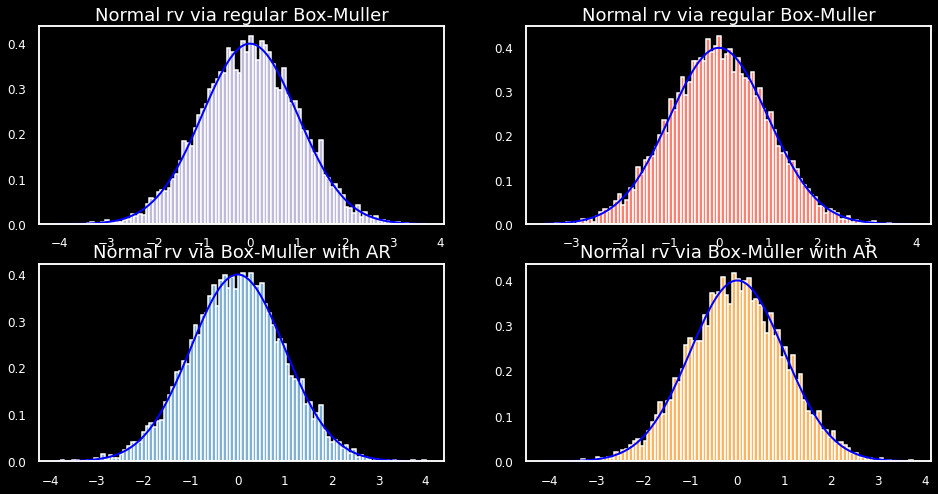

In [7]:
fig, axes = plt.subplots(2, 2, figsize=(16,8))
N = 10000

X_1,X_2 = BoxMuller(N)
n, bins, patches = axes[0,0].hist(X_1,bins = 100,density=True,color = cmap(2))
axes[0,0].plot(bins, sc.stats.norm.pdf(bins,0,1), 'b', linewidth=2)
n, bins, patches = axes[0,1].hist(X_2,bins = 100,density=True,color = cmap(3))
axes[0,1].plot(bins, sc.stats.norm.pdf(bins,0,1), 'b', linewidth=2)
axes[0,1].set_title("Normal rv via regular Box-Muller");axes[0,0].set_title("Normal rv via regular Box-Muller")

Y_1,Y_2 = BoxMuller_AR(N)
n, bins, patches = axes[1,0].hist(Y_1,bins = 100,density=True,color = cmap(4)) 
axes[1,0].plot(bins, sc.stats.norm.pdf(bins,0,1), 'b', linewidth=2)
n, bins, patches = axes[1,1].hist(Y_2,bins = 100,density=True,color = cmap(5))
axes[1,1].plot(bins, sc.stats.norm.pdf(bins,0,1), 'b', linewidth=2)
axes[1,0].set_title("Normal rv via Box-Muller with AR"); axes[1,1].set_title("Normal rv via Box-Muller with AR")

plt.show()

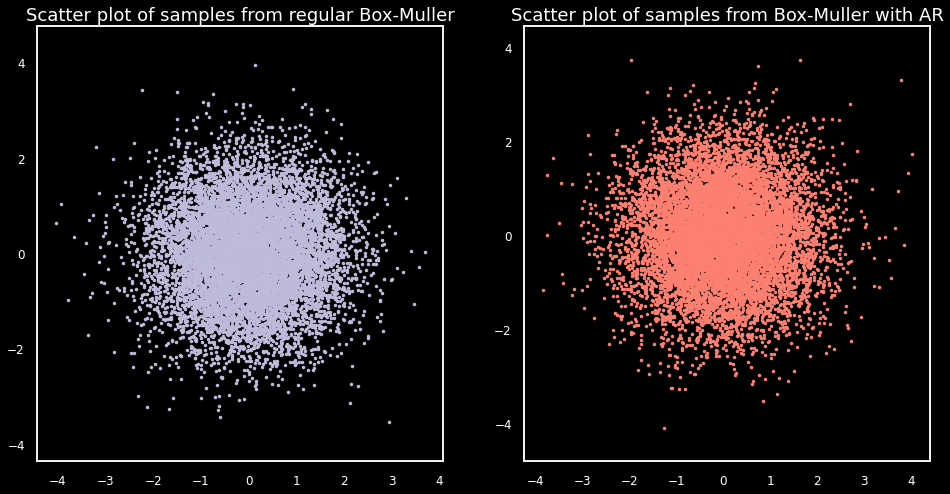

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(16,8))
axes[0].scatter(X_1,X_2,s=4,color=cmap(2)); axes[0].axis('equal')
axes[1].scatter(Y_1,Y_2,s=4,color=cmap(3)); axes[1].axis('equal')
axes[0].set_title("Scatter plot of samples from regular Box-Muller")
axes[1].set_title("Scatter plot of samples from Box-Muller with AR")
plt.show()

### Understanding multivariate Normal rvs

We plot the pdf of a bivariate Normal rv, as well as scatter plots of samples of bivariate Normal rvs with different correlation coefficients

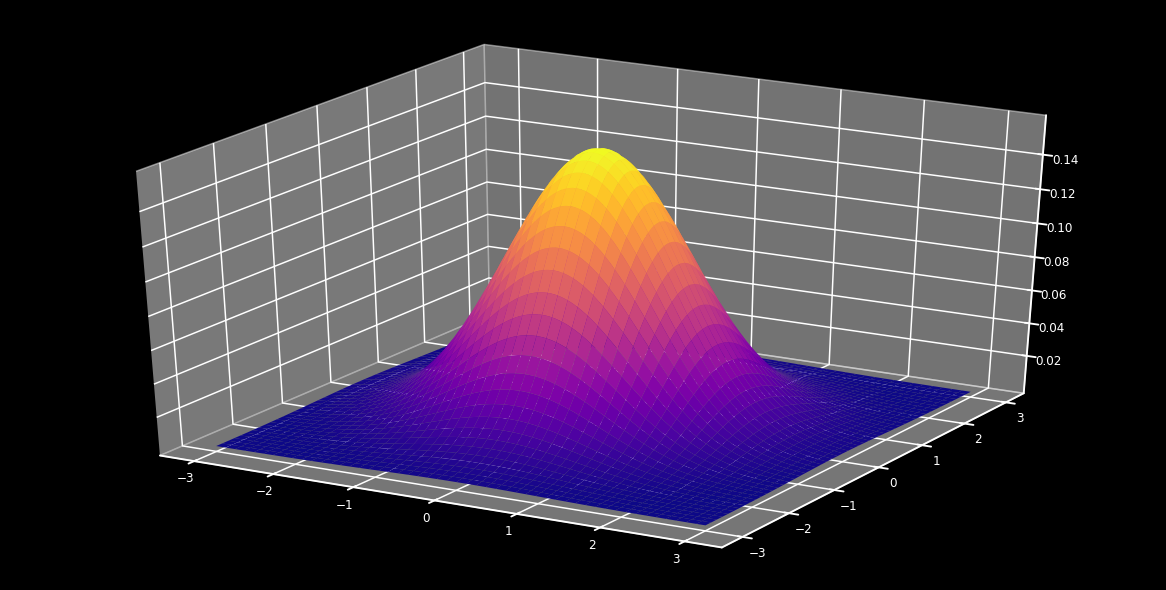

In [9]:
# Distribution parameters
# Note: This always generates a positive definite covariance matrix as long as -1 < rho < 1

#Use for interactive plot
#%matplotlib notebook

mean = [0, 0]
sig_11 = 1.0; sig_22 = 1.0; rho = 0.0
sig12 = sig21 = rho*(sig_11*sig_22)
cov = [[sig_11,sig12], [sig21, sig_22]]

# Create grid and multivariate normal pdf
x = np.linspace(-3,3,500); y = np.linspace(-3,3,500); X, Y = np.meshgrid(x,y)
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X; pos[:, :, 1] = Y
rv = sc.stats.multivariate_normal(mean, cov)

# Make a 3D plot
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(16,8)); ax = Axes3D(fig)
ax.plot_surface(X, Y, rv.pdf(pos),cmap='plasma',linewidth=0)
plt.show()

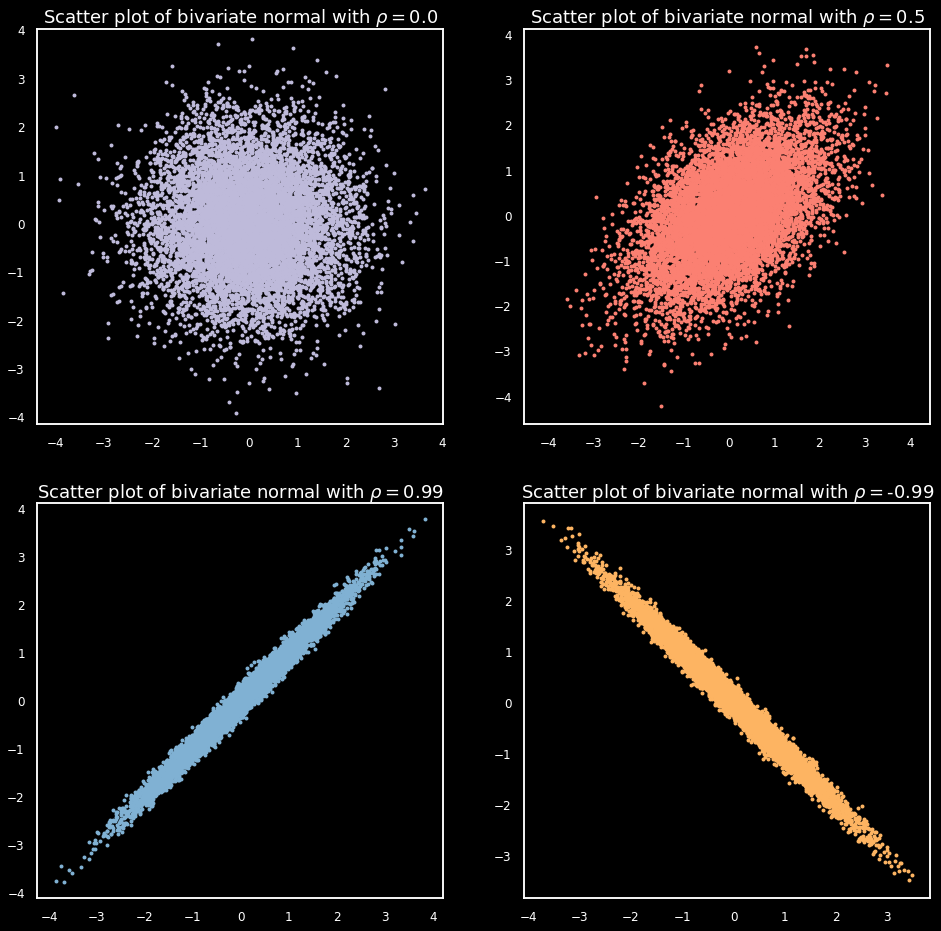

In [10]:
N = 10000
fig, axes = plt.subplots(2, 2, figsize=(16,16))

sig_11 = 1.0; sig_22 = 1.0; rho = 0.0
cov = [[sig_11 , rho*(sig_11*sig_22)], 
       [rho*(sig_11*sig_22) , sig_22]]
x, y = np.random.multivariate_normal(mean, cov, N).T
axes[0,0].scatter(x, y,s=6,color=cmap(2)); axes[0,0].axis('equal')
axes[0,0].set_title(r"Scatter plot of bivariate normal with $\rho=$"+str(rho))

sig_11 = 1.0; sig_22 = 1.0; rho = 0.5
cov = [[sig_11 , rho*(sig_11*sig_22)], 
       [rho*(sig_11*sig_22) , sig_22]]
x, y = np.random.multivariate_normal(mean, cov, N).T
axes[0,1].scatter(x, y,s=6,color=cmap(3)); axes[0,1].axis('equal')
axes[0,1].set_title(r"Scatter plot of bivariate normal with $\rho=$"+str(rho))

sig_11 = 1.0; sig_22 = 1.0; rho = 0.99
cov = [[sig_11 , rho*(sig_11*sig_22)], 
       [rho*(sig_11*sig_22) , sig_22]]
x, y = np.random.multivariate_normal(mean, cov, N).T
axes[1,0].scatter(x, y,s=6,color=cmap(4)); axes[1,0].axis('equal')
axes[1,0].set_title(r"Scatter plot of bivariate normal with $\rho=$"+str(rho))

sig_11 = 1.0; sig_22 = 1.0; rho = -0.99
cov = [[sig_11 , rho*(sig_11*sig_22)], 
       [rho*(sig_11*sig_22) , sig_22]]
x, y = np.random.multivariate_normal(mean, cov, N).T
axes[1,1].scatter(x, y,s=6,color=cmap(5)); axes[1,1].axis('equal')
axes[1,1].set_title(r"Scatter plot of bivariate normal with $\rho=$"+str(rho))

plt.show()

### Generating Correlated Bivariate Normal rv

Given mean vector $\mu$ and covariance matrix $\Sigma$, we want to transform two independent normal rvs $\begin{pmatrix}X_1\\X_2\end{pmatrix}\sim\mathcal{N}(0,I)$ into the desired rvs $\begin{pmatrix}Y_1\\Y_2\end{pmatrix}\sim\mathcal{N}(\mu,\Sigma)$ via the linear transform $$\begin{pmatrix}Y_1\\Y_2\end{pmatrix} = \mu + L\begin{pmatrix}X_1\\X_2\end{pmatrix}$$
Note that this requires $LL^T = \Sigma$; if $\Sigma$ is positive definite, then there are many matrices $M$ that satisfy this. Below, we use two different choices for $L$:
* $L_1$ is the Cholesky decomposition of $\Sigma$ (https://en.wikipedia.org/wiki/Cholesky_decomposition)
* $L_2$ is the principle square-root of $\Sigma$ (https://en.wikipedia.org/wiki/Square_root_of_a_matrix)

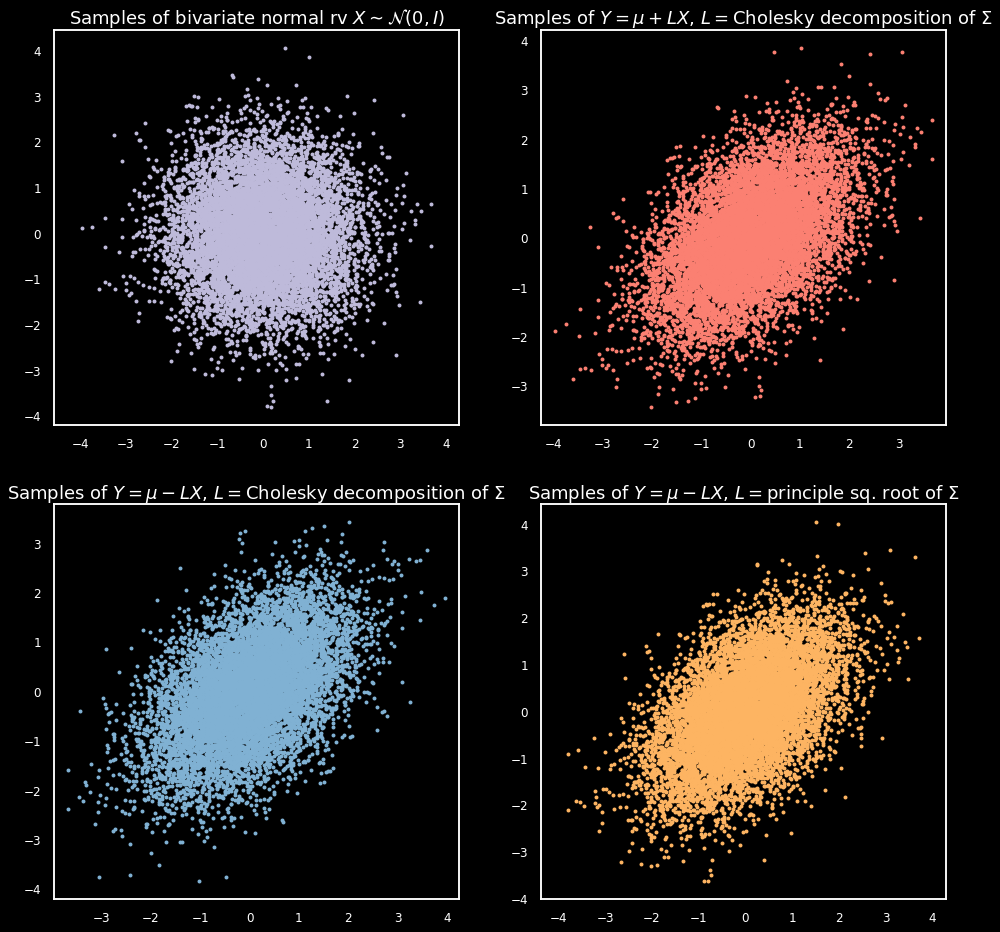

In [14]:
mean = [0.1, -0.1]
sig_11 = 1.0; sig_22 = 1.0; rho = 0.5
cov = [[sig_11 , rho*(sig_11*sig_22)], 
       [rho*(sig_11*sig_22) , sig_22]]

N = 10000
X = BoxMuller(N)

fig, axes = plt.subplots(2, 2, figsize=(16,16))
axes[0,0].scatter(X[0],X[1],s=6,color=cmap(2)); axes[0,0].axis('equal')
axes[0,0].set_title(r"Samples of bivariate normal rv $X\sim\mathcal{N}(0,I)$")

L_1 = np.linalg.cholesky(cov)
Y_1 = np.dot(L_1,X)
axes[0,1].scatter(Y_1[0],Y_1[1],s=6,color=cmap(3)); axes[0,1].axis('equal')
axes[0,1].set_title(r"Samples of $Y=\mu+LX$, $L=$Cholesky decomposition of $\Sigma$")

Y_2 = np.dot(-L_1,X)
axes[1,0].scatter(Y_2[0],Y_2[1],s=6,color=cmap(4)); axes[1,0].axis('equal')
axes[1,0].set_title(r"Samples of $Y=\mu-LX$, $L=$Cholesky decomposition of $\Sigma$")

L_2 = sc.linalg.sqrtm(cov)
Z = np.dot(L_2,X)
axes[1,1].scatter(Z[0],Z[1],s=6,color=cmap(5)); axes[1,1].axis('equal')
axes[1,1].set_title(r"Samples of $Y=\mu-LX$, $L=$principle sq. root of $\Sigma$")

plt.show()

Note that $L_1$ and $L_2$ are different, although $L_1L_1^T = L_2L_2^T = \Sigma$

In [15]:
print('L_1=' + np.array2string(L_1,prefix='L_1=')+'\n')
print('L_1L_1\'=' + np.array2string(np.dot(L_1,L_1.T),prefix='L_1L_1\'=')+'\n')
print('L_2=' + np.array2string(L_2,prefix='L_1=')+'\n')
print('L_2L_2\'=' + np.array2string(np.dot(L_2,L_2.T),prefix='L_1L_1\'=')+'\n')

L_1=[[1.        0.       ]
     [0.5       0.8660254]]

L_1L_1'=[[1.  0.5]
         [0.5 1. ]]

L_2=[[0.96592583 0.25881905]
     [0.25881905 0.96592583]]

L_2L_2'=[[1.  0.5]
         [0.5 1. ]]

